# PFDA-Project-2019

## Programming for Data Analysis Project 2019 - Child Birth

### Simulating Data


### Child Birth Ireland

### Import Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sbn

Below code will be used so that the number of Irish children born can be simulated up to any positive integer, code to ensure number entered into variable is a positive integer adapted from [here.](https://www.quora.com/How-can-I-make-sure-the-user-inputs-a-positive-integer-in-Python)

In [2]:
# code below adapted from above link which prevents numbers less than 0 and non numeric characters being entered.

while True:
	try:
		number_births = int(input("Please enter the number of Irish births you would like to simulate: "))
		assert(number_births>0)
		break
	except:
		print("The number of births must be a positive integer, please try again.")

Please enter the number of Irish births you would like to simulate: 500


### Create Gender Data
After some initial research my simulation will focus on first time parents becasue as the birth order increases this can have an affect on the gender ratio of the child being born as can be seen [here.](https://ourworldindata.org/gender-ratio) As the birth order increases there is a bias in favour of females being born, it may be possible to build this variation into my simulation however further research is required first.

The paper related to the above website on gender ratios can be found [here](https://www.pnas.org/content/116/19/9303), for the generation of the gender data used to validate there sample the authors used a normal distribution. This will also be the distribution I will use in the generation of the gender of the children born in my simulaiton.

In [3]:
gender_number = np.random.normal(loc=0.0, scale=1.0, size=number_births)

After generating the random numbers that I will use as the basis for determining the gender of the children in my simulation I plotted the data in a histogram to confirm the normal distribution of the data. I will create a text column that is linked to this number whereby numbers greater than 0 will be male and less than will be females.

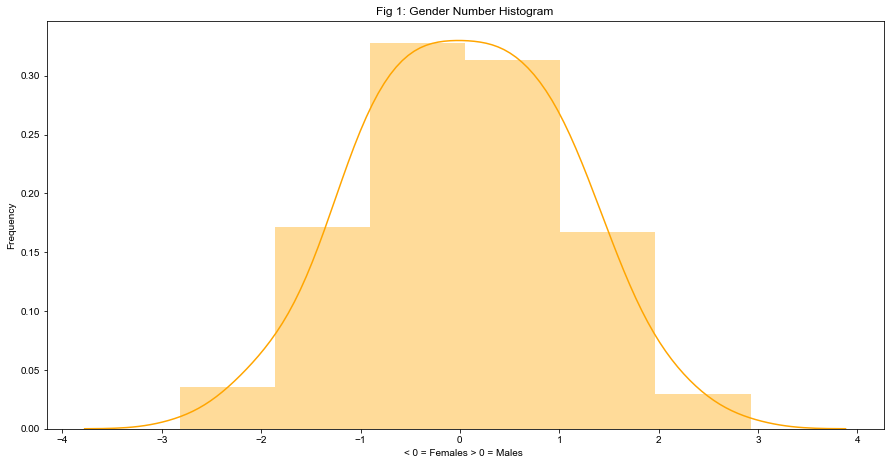

In [4]:
plt.rcParams["figure.figsize"] = (15,7.5)

sbn.distplot(gender_number, color='orange',  bins=6)
sbn.set_style("darkgrid")
plt.title('Fig 1: Gender Number Histogram')
plt.xlabel('< 0 = Females > 0 = Males ')
plt.ylabel('Frequency')
plt.show()

In [5]:
# Convert from numpy array to pandas dataframe, this dataframe will house the data for my final submission

birth_data = pd.DataFrame(gender_number)
birth_data.columns = ['gender_number']

Code to create text of gender based on values gender number column adapted from [here.](https://stackoverflow.com/questions/19913659/pandas-conditional-creation-of-a-series-dataframe-column)

In [6]:
birth_data['gender_text'] = np.where(birth_data['gender_number']>0, 'Male', 'Female')
print(birth_data)

     gender_number gender_text
0        -0.310278      Female
1         0.386164        Male
2        -0.455048      Female
3         1.055178        Male
4        -0.134300      Female
5        -0.872919      Female
6        -0.913455      Female
7        -0.481823      Female
8        -1.528090      Female
9        -0.884627      Female
10        2.065372        Male
11       -1.110936      Female
12        0.635452        Male
13       -0.477142      Female
14        1.246080        Male
15       -0.607636      Female
16        1.753793        Male
17       -0.433583      Female
18        2.362398        Male
19       -0.925383      Female
20        1.232786        Male
21        0.709814        Male
22       -1.122966      Female
23        0.469769        Male
24       -2.114665      Female
25        0.120600        Male
26        1.182267        Male
27       -2.064542      Female
28       -0.665068      Female
29        0.571078        Male
..             ...         ...
470     

### Create Gestation Length Data

Gestation period plays a huge role in the birth weight that a child will be when it is born, (Jukic, et al., 2013) describes several start points for starting the counting of days of gestation. For my analysis I will be using the Last Menstrual Period (LMP) as my start point for measuring the number of days of gestation.

The mean and standard deviation required to generate the gestational data were taken from (Jukic, et al., 2013), the type of distribution that represents gestation period can be seen in (Nassar, et al., 2013). 

Figure 1 taken from (Nassar, et al., 2013) shows the curve of the gestation period over the years 1994-2009 for Australian births, the resulting curve for 2009 apppears to follow a standard normal distribution.


![Figure 1](Resources/Figure_1.png)
**Figure 1**




For my simulation I will generate data for gestational period in days that follows this kind of curve.

In [7]:
# Mean 285 Standar Deviation 14 as per Table I (Jukic, et al., 2013)
# Numbers divided by 7 in order to get number of weeks to be used in birth weight calculation

birth_data['gestation_period'] = np.random.normal(loc=285, scale=14, size=number_births)/7

# Round Gestation Period to nearest whole number
birth_data['gestation_period'] = birth_data['gestation_period'].round(0)

### Create Weight Data

The study carried out in (Charnigo, et al., 2010) set out to model the distributions of birth weights in children. The author goes on to explain that different components of data can have an influence on the shape of the distributions such as smoking preference and ethnicity to name two.

For the purpose of this simulation as highlighted by the author of the above study I will be using a noraml distribution as thre are far too many components to account for all instances but I will use a different mean for either genders and the gestation age in the generation of the data.

In there study (Janssen, et al., 2007) descibed the mean and standard deviations of birth weights broken out by gestation period and gender, table 1 is taken from this study. 

For generating my data I will be using the european baby data, for gestation periods in my simulated data above 41 weeks and below 37 weeks I will combine them with the closest week number I have data for.


**Table 1**
![Table_1](Resources/Table_1.png)

Code to create new column in datafram using apply function adapted from [here](https://stackoverflow.com/questions/30631841/pandas-how-do-i-assign-values-based-on-multiple-conditions-for-existing-columns).

In [8]:
def f(birth_data):
  if birth_data['gender_number'] > 0 and birth_data['gestation_period'] <= 37.0: return np.random.normal(loc=3336.4, scale=434.3, size=None)
  elif birth_data['gender_number'] > 0 and birth_data['gestation_period'] == 38 : return np.random.normal(loc=3359.4, scale=416.3, size=None)
  elif birth_data['gender_number'] > 0 and birth_data['gestation_period'] == 39 : return np.random.normal(loc=3586.0, scale=460.3, size=None)  
  elif birth_data['gender_number'] > 0 and birth_data['gestation_period'] == 40 : return np.random.normal(loc=3687.6, scale=410.5, size=None)
  elif birth_data['gender_number'] > 0 and birth_data['gestation_period'] >= 41 : return np.random.normal(loc=3877.1, scale=384.4, size=None)
  elif birth_data['gender_number'] < 0 and birth_data['gestation_period'] <= 37 : return np.random.normal(loc=3050.7, scale=414.1, size=None)
  elif birth_data['gender_number'] < 0 and birth_data['gestation_period'] == 38 : return np.random.normal(loc=3293.5, scale=423.3, size=None)
  elif birth_data['gender_number'] < 0 and birth_data['gestation_period'] == 39 : return np.random.normal(loc=3455.8, scale=434, size=None)
  elif birth_data['gender_number'] < 0 and birth_data['gestation_period'] == 40 : return np.random.normal(loc=3639.5, scale=458.2, size=None)
  elif birth_data['gender_number'] < 0 and birth_data['gestation_period'] >= 41 : return np.random.normal(loc=3696.8, scale=448, size=None)
  else: return 0

birth_data['birth_weight'] = birth_data.apply(f, axis=1)

# Round birth weight to 0 decimals
birth_data['birth_weight'] = birth_data['birth_weight'].round(0)

In [9]:
print(birth_data)

     gender_number gender_text  gestation_period  birth_weight
0        -0.310278      Female              41.0        3445.0
1         0.386164        Male              39.0        3915.0
2        -0.455048      Female              42.0        3651.0
3         1.055178        Male              38.0        3763.0
4        -0.134300      Female              41.0        3792.0
5        -0.872919      Female              42.0        3277.0
6        -0.913455      Female              37.0        3413.0
7        -0.481823      Female              43.0        2996.0
8        -1.528090      Female              41.0        3784.0
9        -0.884627      Female              43.0        3476.0
10        2.065372        Male              41.0        3677.0
11       -1.110936      Female              38.0        3288.0
12        0.635452        Male              40.0        3097.0
13       -0.477142      Female              40.0        3254.0
14        1.246080        Male              39.0       

In [10]:
birth_data.describe()

,gender_number,gestation_period,birth_weight
count,500.000000,500.000000,500.000000
mean,0.045858,40.724000,3667.750000
std,1.042744,2.069877,461.746267
min,-2.821244,35.000000,2297.000000
25%,-0.689567,39.000000,3374.750000
50%,0.029050,41.000000,3690.000000
75%,0.804960,42.000000,3961.250000
max,2.926374,48.000000,5114.000000


### References

Central Statistics Office Ireland, Unknown. Vital Statistics Annual Report 2017 - Births 2017, Dublin: Central Statistics Office Ireland.

Chao, F., Gerland, P., Cook, A. R. & Alkema, L., 2019. Systematic assessment of the sex ratio at birth for all countries and estimation of national imbalances and regional reference levels. PNAS, 116(19), pp. 9303 - 9311.

Charnigo, R., Chesnut, L. W., LoBianco, T. & Kirby, R. S., 2010. Thinking outside the curve, part I: modeling birthweight distribution. BMC, 28 Jul.10(37).

Janssen, P. A. et al., 2007. Standards for the measurement of birth weight, length and head circumference at term in neonates of European, Chinese and South Asian ancestry. Open Medicine, 10 Jul, 1(2), pp. 74-88.

Jukic, A. M. et al., 2013. Length of human pregnancy and contributors to its natural variation. Human Reproduction, 6 Aug, 28(10), pp. 2848 - 2855.

Ritchie, H. & Roser, M., 2019. Gender Ratio. [Online] 
Available at: https://ourworldindata.org/gender-ratio
[Accessed 01 Onward December 2019].

Walsh, A.-M., 2008. Big is beautiful as experts dispel 'sumo baby' myth. [Online] 
Available at: https://www.independent.ie/irish-news/big-is-beautiful-as-experts-dispel-sumo-baby-myth-26454311.html
[Accessed 01 Onward December 2019].

##### 